<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Regresion-Lineal/blob/main/4_Limitaciones_Regresi%C3%B3n_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este apunte nos enfocaremos en dos de las limitantes más importantes de regresión lineal: outliers y heterocedasticidad. 

Para esta parte utilizaremos un dataset diferente que se encuentra dentro de la librería Seaborn. En este caso sobre [propinas en restaurantes](https://github.com/mwaskom/seaborn-data).

In [24]:
import numpy as np
from scipy.stats import norm 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [43]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Por cuestión de procesamientos posteriores, no usaremos las siguientes columnas categóricas.

In [46]:
df.drop(["sex", "smoker", "day", "time"], axis=1, inplace=True)

Las columnas restantes son:

* **total_bill**: el total de la cuenta
* **tip**: propinas
* **size**: número de comensales

## Outliers

Poder identificar a los outliers es muy sencillo. Todo lo que tenemos que hacer es utilizar la función *boxplot* dentro de seaborn para generar un diagrama de caja.

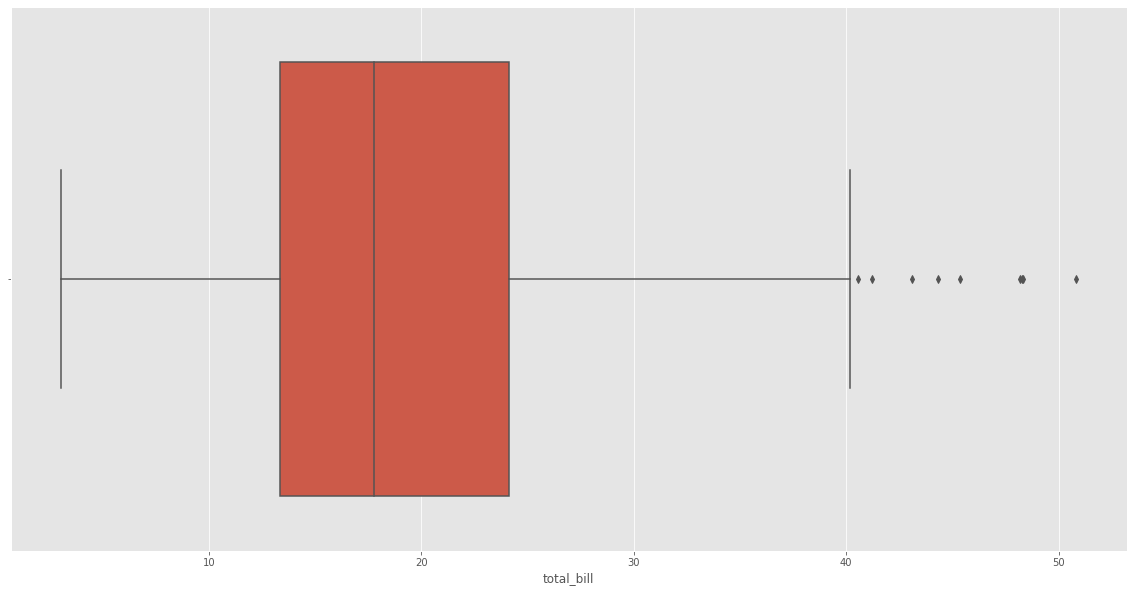

In [13]:
ax = sns.boxplot(x=df["total_bill"])

Lo que podemos apreciar es el 

* Mínimo y máximo no atípico, representados por las líneas en los extremos.
* El rango intercuartílico, representado por la caja en rojo. En este caso, tenemos un rango que va del cuartil 1 (Q1) al cuartil 3 (Q3). Dentro de este encontramos a la mayoría de nuestros data points.
* La línea dentro de la caja roja que representa a la mediana.
* Los puntos fuera del máximo no atípico, que son los outliers o valores atípicos.

En este caso podemos ver que tenemos 8 valores atípicos que podría afectar a nuestro modelo.

## Heterocedasticidad

Para evaluar la heterocedasticidad, solo tenemos que correr de nuevo la función *regplot* dentro de Seaborn. 

En este caso evaluaremos la correlación entre el total de la cuenta y las propinas.

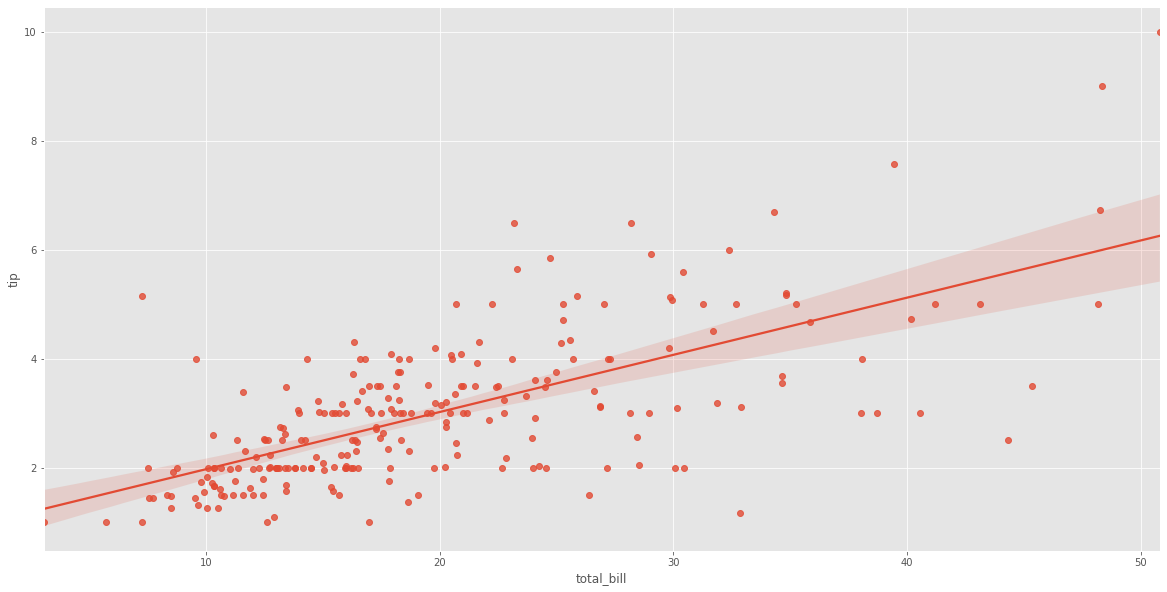

In [15]:
sns.regplot(x=df["total_bill"], y=df["tip"])

En este caso podemos ver hay más homocedasticidad (lo contrario de heterocedasticidad) al principio de la línea, pero que la varianza aumenta al avanzar la línea.

Es decir, las propinas suelen ser similares cuando la cuenta es pequeña. Sin embargo, varía más a medida que la cuenta se vuelve más grande. 

# Una Posible Solución

Como mencionamos, una de las posibles formulas es descartar a los outliers. Esta es una opción válida para algunos casos y se debe de tener cuidado al usarla. De ninguna manera es una bala de plata para todos los problemas, ya que los outliers podrían tener información importante.

En este caso preservaremos solo los valores dentro del rango intercuartílico. 

Antes que nada veamos la información básica del dataset y su distribución normal. 

In [45]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


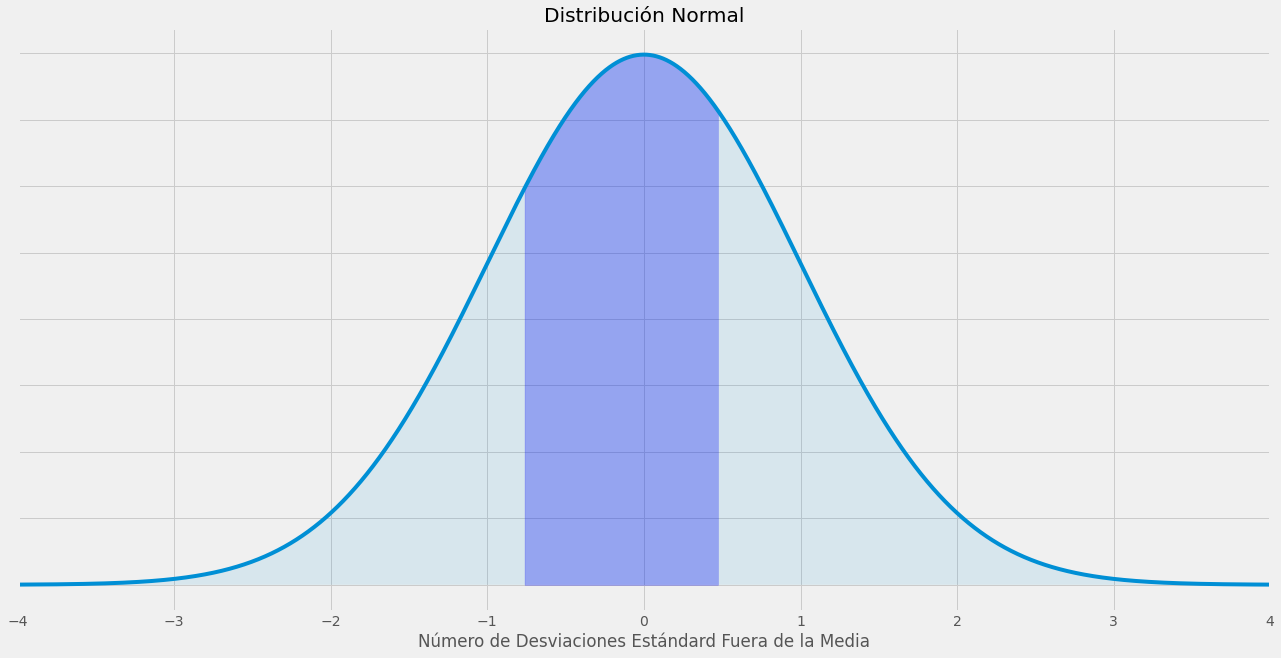

In [29]:
mu = df["total_bill"].mean() 
sigma = df["total_bill"].std() 
x1 =  13
x2 = 24

z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

x = np.arange(z1, z2, 0.001) 
x_all = np.arange(-10, 10, 0.001) 
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)


fig, ax = plt.subplots(figsize=(20,10))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('Número de Desviaciones Estándard Fuera de la Media')
ax.set_yticklabels([])
ax.set_title('Distribución Normal')

plt.show()

Lo primero que haremos es determinar el rango intercuartílico de nuestro data set con la función *quantile*.

In [47]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

IQR

total_bill    10.7800
tip            1.5625
size           1.0000
dtype: float64

Con el siguiente código eliminamos todos los valores de nuestro dataset que se encuentran fuera del rango intercuartílico. 

In [49]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
238,35.83,4.67,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


Vemos ahora que al quitar los valores atípicos, solo perdimos que hemos perdido 10 de ellos. Por ende, la solución podría ser válida. 

Vemos que resultado ha dado:

In [50]:
df.describe()

,total_bill,tip,size
count,223.000000,223.000000,223.000000
mean,18.229596,2.772691,2.408072
std,7.126527,1.062391,0.746962
min,3.070000,1.000000,1.000000
25%,13.015000,2.000000,2.000000
50%,16.970000,2.610000,2.000000
75%,22.175000,3.480000,3.000000
max,40.170000,5.850000,4.000000


Primero vemos que el promedio ajustado pasó de 19.78 a 18.22 en las cuentas y de 2.99 a 2.77 en las propinas. Mientras que el número de comensales no varío demasiado.

Sin embargo, hubo una variación importante en la desviación estándard en las cuentas. Esta pasó de 19.78 a 18.22 cuando se ajusta. 

Estos cambios podrían indicar que hay un grupo de personas que consumen bastante más que el resto de comensales, por lo que al excluirlos tenemos una idea más clara del comportamiento de la mayoría de ellos.

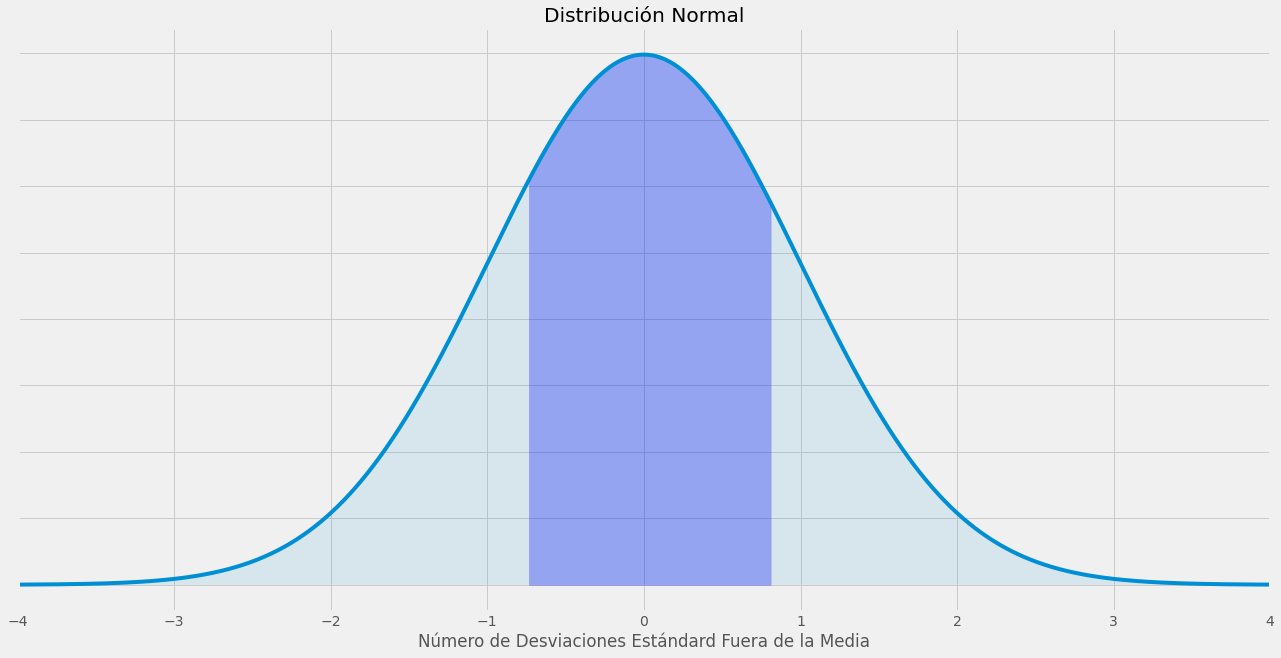

In [51]:
mu = df["total_bill"].mean() 
sigma = df["total_bill"].std() 
x1 =  13
x2 = 24

z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

x = np.arange(z1, z2, 0.001) 
x_all = np.arange(-10, 10, 0.001) 
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)


fig, ax = plt.subplots(figsize=(20,10))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('Número de Desviaciones Estándard Fuera de la Media')
ax.set_yticklabels([])
ax.set_title('Distribución Normal')

plt.show()

Como era de esperar, hubo un cambio importante en la distribución normal. Vemos que la segunda es más equisdistante que la primera. Este es un resultado obvio de haber excluido a los outliers que se encontraban fuera del límite máximo no atípico. 